In [107]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import loadtxt
from numpy import cos,sin,pi,arctan,arcsin,pi,array
import warnings
warnings.filterwarnings("ignore")

'''function to help find the equation of a line on a log scale'''

def slope(dx, dy):
    return (dy / dx) if dx else None

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({}, {})'.format(self.x, self.y)

    def __repr__(self):
        return 'Point({}, {})'.format(self.x, self.y)

    def halfway(self, target):
        midx = (self.x + target.x) / 2
        midy = (self.y + target.y) / 2
        return Point(midx, midy)

    def distance(self, target):
        dx = target.x - self.x
        dy = target.y - self.y
        return (dx*dx + dy*dy) ** 0.5

    def reflect_x(self):
        return Point(-self.x,self.y)

    def reflect_y(self):
        return Point(self.x,-self.y)

    def reflect_x_y(self):
        return Point(-self.x, -self.y)

    def slope_from_origin(self):
        return slope(self.x, self.y)

    def slope(self, target):
        return slope(target.x - self.x, target.y - self.y)

    def y_int(self, target):       # <= here's the magic
        return self.y - self.slope(target)*self.x

    def line_equation(self, target):
        slope = self.slope(target)

        y_int = self.y_int(target)
        if y_int < 0:
            y_int = -y_int
            sign = '-'
        else:
            sign = '+'

        return '{}x {} {}'.format(slope, sign, y_int)

    def line_function(self, target):
        slope = self.slope(target)
        y_int = self.y_int(target)
        def fn(x):
            return slope*x + y_int
        return fn

In [4]:
'''Constant Parameters'''

#setting unit conversion values for distances
pc=3.1*10**16 #[m] meter #pc in meters #(pc) parsec
Rg=1.5*10**11 #[m] meter #rg in meters (for a BH of mass 10^8 Msun) #(rg) gravitational radius
Rs=2*Rg #[m] meter #rs in meters (also simply 3*10**11) #(rs) schwarzschild radius

#setting values of fundamental constants
from math import e 
G=6.67*(10**-11) #[(m**3)/(kg*(s**2))] cubic meter per kilogram second squared #(G) gravitational constant
M=(10**8)*1.99*(10**30) #[kg] kilogram #(M) mass of SMBH
year=3.154*10**7 #[s] second #(year) seconds per year
Cd=1 #[unitless] #(coeff of drag)
cs=10**4 #[m/s] meter per second #(cs) speed of sound


#setting paramenters of orbiting object
msun=1.989*(10**30) #[kg] kilogram #(msun) mass of our sun
rsun=6.957*(10**8) #[m] meter #(rsun) radius of our sun
#ρsun=1410 #[kg/m^3] kilogram per cubic meter #(ρsun) density of our sun
#Asun=4*pi*(rsun**2) #[m^2] meter squared #(Asun) area of our sun

mmstar=0.5*msun #[kg] kilogram #(mmstar) mass of m star
rmstar=0.4*rsun #[m] meter #(rmstar) radius of m star
#ρmstar=8806 #[kg/m^3] kilogram per cubic meter #(ρmstar) density of m star

mostar=50*msun #[kg] kilogram #(mostar) mass of o star
rostar=15*rsun #[m] meter #(rostar) radius of o star
#ρostar=27.8 #[kg/m^3] kilogram per cubic meter #(ρostar) density of o star

mrgiant=1.5*msun #[kg] kilogram #(mrgiant) mass of red giant 
rrgiant=100* rsun #[m] meter #(rrgiant) radius of red giant
#ρrgiant=2.81 #[kg/m^3] kilogram per cubic meter #(ρrgiant) density of red giant

m_sBH=10*msun #[kg] kilogram #(m_sBH) mass of stellar mass black hole

def Astar(rstar): #m^2
    A=pi*(rstar**2)
    return A
def volstar(rstar): #m^3
    vol=(4/3)*pi*(rstar**3)
    return vol
def ρstar(mstar,rstar):
    den=mstar/volstar(rstar)
    return den

ρsun=ρstar(msun,rsun)
ρmstar=ρstar(mmstar,rmstar)
ρostar=ρstar(mostar,rostar)
ρrgiant=ρstar(mrgiant,rrgiant)

In [5]:
'''importing disk data for TQM model'''

#importing data for logged (a,h/a)
hoverr_TQM=loadtxt("JillianTQMdisk/hoverr.txt") #raw data

#(a) distance from SMBH
hapc_TQM=(10**hoverr_TQM[:,0]) #[pc] parsec #unlogged data #(a) distance from SMBH
ham_TQM=pc*hapc_TQM #[m] meter #for calculations #(a) distance from SMBH
harg_TQM=ham_TQM/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

#(h/a) ratio of distances
hovera_TQM=10**hoverr_TQM[:,1] #[unitless] #unlogged data #(h/a) ratio of distances

#(h) disk thickness
h_TQM=ham_TQM*hovera_TQM #[m] meter #calculating thickness #(h) disk thickness

#########################################################

#importing data for logged (a,σ)
σden_TQM=loadtxt("JillianTQMdisk/SurfaceDensity.txt") #raw data

#(a) distance from SMBH
σapc_TQM=(10**σden_TQM[:,0]) #[pc] parsec #unlogged data #(a) distance from SMBH
σam_TQM=pc*σapc_TQM #[m] meter #for calculations #(a) distance from SMBH
σarg_TQM=σam_TQM/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

#(σ) disk surface density
σ_TQM=10**σden_TQM[:,1] #[g/(cm^2)] gram per centimeter squared #unlogged data #(σ) disk surface density

#########################################################
#(a) distance from SMBH
apclog_TQM=hoverr_TQM[:,0] #raw data #compiled list of (a) values
apc_TQM=(10**apclog_TQM) #[pc] parsec #unlogged data #(a) distance from SMBH
am_TQM=pc*apc_TQM #[m] meter #for calculations #(a) distance from SMBH
arg_TQM=am_TQM/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

In [6]:
'''importing disk data for SG model'''

#importing data for logged (a,h/a)
hoverr_SG=loadtxt("JillianSGdisk/hoverr.txt") #raw data

#(a) distance from SMBH
hars_SG=(10**hoverr_SG[:,0]) #[rs] schwarzschild radius #unlogged data #(a) distance from SMBH
ham_SG=Rs*hars_SG #[m] meter #for calculations #(a) distance from SMBH
harg_SG=ham_SG/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

#(h/a) ratio of distances
hovera_SG=10**hoverr_SG[:,1] #[unitless] #unlogged #(h/a) ratio of distances

#(h) disk thickness
h_SG=ham_SG*hovera_SG #[m] meter #calculating thickness #(h) disk thickness

#########################################################

#importing data for logged (a,σ)
σden_SG=loadtxt("JillianSGdisk/SurfaceDensity.txt") #raw data

#(a) distance from SMBH
σars_SG=(10**σden_SG[:,0]) #[rs] schwarzschild radius #unlogged data #(a) distance from SMBH
σam_SG=Rs*σars_SG #[m] meter #for calculations #(a) distance from SMBH
σarg_SG=σam_SG/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

#(σ) disk surface density
σ_SG=10**σden_SG[:,1] #[g/(cm^2)] gram per centimeter squared #unlogged data #(σ) disk surface density

#########################################################
#(a) distance from SMBH
arslog_SG=hoverr_SG[:,0] #raw data #compiled list of (a) values
ars_SG=(10**arslog_SG)#[rs] schwarzschild radius #unlogged data #(a) distance from SMBH
am_SG=Rs*ars_SG #[m] meter #for calculations #(a) distance from SMBH
arg_SG=am_SG/Rg #[rg] gravitational radius #for plotting #(a) distance from SMBH

In [7]:
# interpolating h as a function of radius
#(h) interpolated disk thickness for TQM
def hint_TQM(am):
    a=am/Rg
    for i in range(len(harg_TQM)-1):
        j=i+1
        c = Point(harg_TQM[i],h_TQM[i])
        d = Point(harg_TQM[j],h_TQM[j])
        if ((a>=harg_TQM[i]) and (a<=harg_TQM[j])):
            y=(slope(harg_TQM[j]-harg_TQM[i],h_TQM[j]-h_TQM[i])*a)+(Point.y_int(c,d))
    return y
#(h) interpolated disk thickness for SG
def hint_SG(am):
    a=am/Rg
    for i in range(len(harg_SG)-1):
        j=i+1
        c = Point(harg_SG[i],h_SG[i])
        d = Point(harg_SG[j],h_SG[j])
        c_36 = Point(harg_SG[36],h_SG[36])
        d_37 = Point(harg_SG[37],h_SG[37])
        if ((a>=harg_SG[i]) and (a<=harg_SG[j])):
            y=(slope(harg_SG[j]-harg_SG[i],h_SG[j]-h_SG[i])*a)+(Point.y_int(c,d))
        if ((a>harg_SG[37]) and (a<=σarg_SG[29])):
            y=(slope(harg_SG[37]-harg_SG[36],h_SG[37]-h_SG[36])*a)+(Point.y_int(c_36,d_37))
    return y

# interpolating σ as a function of radius
#(σ) interpolated disk surface density for TQM
def σint_TQM(am):
    a=am/Rg
    for i in range(len(σarg_TQM)-1):
        j=i+1
        c = Point(σarg_TQM[i],σ_TQM[i])
        d = Point(σarg_TQM[j],σ_TQM[j])
        c_0 = Point(σarg_TQM[0],σ_TQM[0])
        d_1 = Point(σarg_TQM[1],σ_TQM[1])
        c_24 = Point(σarg_TQM[24],σ_TQM[24])
        d_25 = Point(σarg_TQM[25],σ_TQM[25])
        if ((a>=harg_TQM[0]) and (a<σarg_TQM[0])):
            y=(slope(σarg_TQM[1]-σarg_TQM[0],σ_TQM[1]-σ_TQM[0])*a)+(Point.y_int(c_0,d_1))
        if ((a>=σarg_TQM[i]) and (a<=σarg_TQM[j])):
            y=(slope(σarg_TQM[j]-σarg_TQM[i],σ_TQM[j]-σ_TQM[i])*a)+(Point.y_int(c,d))
        if ((a>σarg_TQM[25]) and (a<=harg_TQM[33])):
            y=(slope(σarg_TQM[25]-σarg_TQM[24],σ_TQM[25]-σ_TQM[24])*a)+(Point.y_int(c_24,d_25))
    return y
#(σ) interpolated disk surface density for SG
def σint_SG(am):
    a=am/Rg
    for i in range(len(σarg_SG)-1):
        j=i+1
        c = Point(σarg_SG[i],σ_SG[i])
        d = Point(σarg_SG[j],σ_SG[j])
        c_0 = Point(σarg_SG[0],σ_SG[0])
        d_1 = Point(σarg_SG[1],σ_SG[1])
        if ((a>=harg_SG[0]) and (a<σarg_SG[0])):
            y=(slope(σarg_SG[1]-σarg_SG[0],σ_SG[1]-σ_SG[0])*a)+(Point.y_int(c_0,d_1))
        if ((a>=σarg_SG[i]) and (a<=σarg_SG[j])):
            y=(slope(σarg_SG[j]-σarg_SG[i],σ_SG[j]-σ_SG[i])*a)+(Point.y_int(c,d))
    return y

#(ρ) calculated disk surface density for TQM
def ρ_TQM(am): #creating a density function ρ with respect to radius
    ρcal=σint_TQM(am)/(hint_TQM(am)*100) #[g/(cm^3)] gram per cubic centimeter #converted h from [m] to [cm] #(ρcal) calculated density
    ρconv=ρcal*(10**3) #[kg/(m^3)] kilogram per cubic meter #(ρconv) converted density
    return ρconv
#(ρ) calculated disk density for SG
def ρ_SG(am): #creating a density function ρ with respect to radius
    ρcal=σint_SG(am)/(hint_SG(am)*100) #[g/(cm^3)] gram per cubic centimeter #converted h from [m] to [cm] #(ρcal) calculated density
    ρconv=ρcal*(10**3) #[kg/(m^3)] kilogram per cubic meter #(ρconv) converted density
    return ρconv

In [8]:
'''defining plotting functions, etc, for characteristics of each model'''
'''Everything in the next three cells depends soley on the model'''

#(a,h/a) 
#(h/a) ratio of distances plot function
def hovera_plot(): 
    logPlot=plt.gca()
    logPlot.loglog(harg_TQM,hovera_TQM, label='TQM',c='r')
    logPlot.loglog(harg_SG,hovera_SG, label='SG',c='b')
    plt.title('Height/Radius (h/a) vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Height/Radius [m/m]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('1 Height_a vs a.pdf')
    
#(a,h)
#(h) disk thickness plot function
def h_plot(): 
    logPlot=plt.gca()
    bsfont = {'fontname':'Cambria Math'}
    logPlot.loglog(harg_TQM,h_TQM,lw=2, label='TQM',c='r')
    logPlot.loglog(harg_SG,h_SG,lw=2, label='SG',c='b')
    plt.title('Height of Disk (h) vs Radius (a)',**bsfont)
    logPlot.set_xlabel('Radius [Rg]',**bsfont)
    logPlot.set_ylabel('Height [m]',**bsfont)
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('2 Height vs a.pdf')

#(a,h)
#(h) interpolated disk thickness plot function
def hint_plot(): # (a,h) & (a,hint) comparison
    #creating a list of values for interpolated thickness hint
    h_int_TQM=[]
    for i in range(len(am_TQM)):
        h_int_TQM.append(hint_TQM(am_TQM[i]))
    h_int_SG=[]
    for i in range(len(am_SG)):
        h_int_SG.append(hint_SG(am_SG[i]))
    logPlot=plt.gca()
    logPlot.loglog(am_TQM/Rg,h_int_TQM,label='TQM interpolated',c='pink')
    logPlot.loglog(am_SG/Rg,h_int_SG,label='SG interpolated',c='purple')
    plt.title('Height of Disk (h) vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Height (interpolated) [m]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('2a Height-interp vs a.pdf')

#(a,σ)
#(σ) disk surface density plot function
def σ_plot(): 
    logPlot=plt.gca()
    logPlot.loglog(σarg_TQM,σ_TQM, label='TQM',c='r')
    logPlot.loglog(σarg_SG,σ_SG, label='SG',c='b')
    plt.title('Surface Density of Disk vs a')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Surface Density [g/cm^2]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('3 SurfaceDensity vs a.pdf')

#(a,σ)
#(σ) interpolated disk surface density plot function
def σint_plot(): # (a,σ) & (a,σint) comparison
    #creating lists of values for interpolated surface density σint
    σdenint_TQM=[]
    for i in range(len(am_TQM)):
        σdenint_TQM.append(σint_TQM(am_TQM[i]))
    σdenint_SG=[]
    for i in range(len(am_SG)):
        σdenint_SG.append(σint_SG(am_SG[i]))
    logPlot=plt.gca()
    logPlot.loglog(am_TQM/Rg,σdenint_TQM,label='TQM interpolated',c='pink')
    logPlot.loglog(am_SG/Rg,σdenint_SG,label='SG interpolated',c='purple')
    plt.title('Surface Density of Disk vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Surface Density (interpolated) [g/cm^2]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('3a SurfaceDensity-interp vs a.pdf')

#(a,ρ) 
#(ρ) disk density plot function
def ρ_plot(): 
    #creating a list of values for (ρ) disk density
    ρden_TQM=[]
    for i in range(len(am_TQM)):
        ρden_TQM.append(ρ_TQM(am_TQM[i]))
    ρden_SG=[]
    for i in range(len(am_SG)):
        ρden_SG.append(ρ_SG(am_SG[i]))
    logPlot=plt.gca()
    logPlot.loglog(am_TQM/Rg,ρden_TQM,lw=2,label='TQM',c='r')
    logPlot.loglog(am_SG/Rg,ρden_SG,lw=2,label='SG',c='b')
    plt.title('Density of Disk (p) vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Density [kg/m^3]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('4 Density vs a.pdf')

In [9]:
'''(h/a) ratio of distances plot'''
#[rg] gravitational radius #(a) distance from SMBH
#[unitless] #(h/a) ratio of distances

#hovera_plot()

'(h/a) ratio of distances plot'

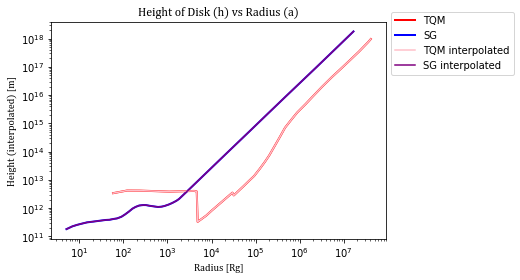

In [10]:
'''(h) disk thickness plots'''
#[rg] gravitational radius #(a) distance from SMBH
#[m] meter #(h) disk thickness

h_plot()
hint_plot()

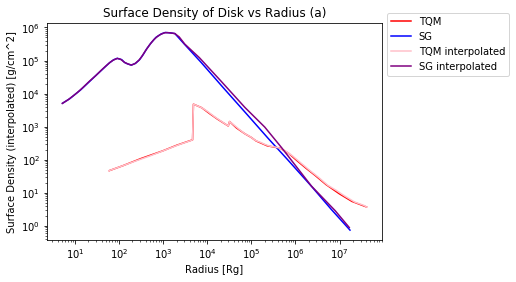

In [11]:
'''(σ) disk surface density plots'''
#[rg] gravitational radius #(a) distance from SMBH
#[g/(cm^2)] gram per centimeter squared #(σ) disk surface density

σ_plot()
σint_plot()

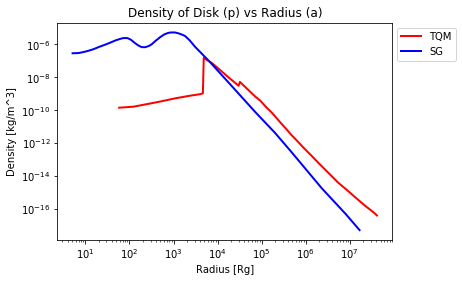

In [12]:
'''(ρ) disk density plot'''
#[rg] gravitational radius #(a) distance from SMBH
#[kg/(m^3)] kilogram per cubic meter #(ρ) disk density

ρ_plot()

In [13]:
'''The things in this cell are independent of the disk model / only depend on the position of the orbiting object'''

# keplarian velocity vel components
def vkx(i,am):#m/s
    kcomp=vel(am)*cos(i)
    return kcomp
def vky(i,am):#m/s
    kcomp=vel(am)*sin(i)
    return kcomp
# relative velocity component-wise
def vrx(i,am):#m/s
    if i<=pi/2:
        thetacomp=vel(am)-vkx(i,am)
    if i>=pi/2:
        thetacomp=vkx(i,am)-vel(am)
    return thetacomp
def vry(i,am):#m/s
    rcomp=vky(i,am)
    return rcomp

def vel(am): #keplerian velocity v as function of radius #input a in meters
    speed=((2*G*M/am)**0.5) #m/s
    return speed
def vel_plot(): # (a,vel) for i=0 (i.e. no inclination)
    logPlot=plt.gca()
    logPlot.loglog(harg,vel(ham)/1000,label='velocity; i=0')
    plt.title('Keplerian Velocity (v) vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Keplerian Velocity [km/s]')
    #logPlot.legend()
    #ax = plt.subplot(111)
    #ax.legend(loc='center left', bbox_to_anchor=(0.6,0.8))
    plt.savefig('5 Keplerian velocity vs a.pdf')



def circ(am): #creating function for circumference as a fuction of radius
    c=2*pi*am
    return c #meters

def Torb(am): #creating function for time of orbit Torb as function of radius #input radius in meters
    torb=(circ(am))/(vel(am)) 
    return torb #units of seconds
def Torb_plot(): # (a,Torb)
    #31,557,600 s/yr
    #a=10**4 -> Torb=100yr
    logPlot=plt.gca()
    logPlot.loglog(harg,Torb(ham),label='Torbit')
    plt.title('Time per orbit (Torb) vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Time of orbit [s]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.savefig('6 Time orb vs a.pdf')
    
def rBH(i,am): #r bondi
    r=(2*G*m_sBH)/((vry(i,am)**2)+(cs**2))
    return r
r_sBH=rBH(pi/4,(10**4)*Rg)
ρ_sBH=ρstar(m_sBH,r_sBH)

In [42]:
'''Here things depend on both the position of the object, as well as the disk model'''

def arc(i,am,hint): #creating function for arc length as function of i & radius
    s=2*am*arcsin(hint(am)/(2*am*sin(i)))
    return s #meters

def Tdisk(i,am,hint): #creating function for time in disk Tdisk as function of i & a !!! CHECK THIS; i recall it being off by (an extra) factor of pi
    #tdisk=(2*hint(arg)*Torb(am))/circ(am) #currently assumes fixed inclination angle=pi/2 #needs to be a func of i
    #t=(arc(i,am,hint)/circ(am))*Torb(am)
    t=arc(i,am,hint)*Torb(am) ### let's try with this new one
    return t #seconds

def Tratio(i,am,hint): #creating function for time ratio
    ratio=Tdisk(i,am,hint)/Torb(am)
    return ratio #unitless

def Tdisk_plot(i): # (a,Tdisk)
    #creating a list of values for Tdisk
    Tdisk_TQM=[]
    for j in range(len(am_TQM)):
        Tdisk_TQM.append(Tdisk(i,am_TQM[j],hint_TQM))
    Tdisk_SG=[]
    for j in range(len(am_SG)):
        Tdisk_SG.append(Tdisk(i,am_SG[j],hint_SG))
    logPlot=plt.gca()
    logPlot.loglog(harg_TQM,h_TQM,label='TQM Height of Disk',c='r')
    logPlot.loglog(harg_SG,h_SG,label='SG Height of Disk',c='b')
    logPlot.loglog(arg_TQM,Tdisk_TQM,lw=2,label='TQM Time in Disk',c='r')
    logPlot.loglog(arg_SG,Tdisk_SG,lw=2,label='SG Time in Disk',c='b')
    plt.title('Tdisk vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Tdisk [s]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('7 Timedisk_Timeorb vs a.pdf')
    
def Tratio_plot(i): # (a,Tdisk/Torb)
    #creating a list of values for Tratio
    Tratio_TQM=[]
    for j in range(len(am_TQM)):
        Tratio_TQM.append(Tratio(i,am_TQM[j],hint_TQM))
    Tratio_SG=[]
    for j in range(len(am_SG)):
        Tratio_SG.append(Tratio(i,am_SG[j],hint_SG))
    logPlot=plt.gca()
    logPlot.loglog(harg_TQM,hovera_TQM,label='TQM Distance Ratio (Height/Radius)',c='r')
    logPlot.loglog(harg_SG,hovera_SG,label='SG Distance Ratio (Height/Radius)',c='b')
    logPlot.loglog(arg_TQM,Tratio_TQM,lw=2,label='TQM Time Ratio (Tdisk/Torb)',c='r')
    logPlot.loglog(arg_SG,Tratio_SG,lw=2,label='SG Time Ratio (Tdisk/Torb)',c='b')
    plt.title('Tdisk/Torb vs Radius (a)')
    logPlot.set_xlabel('Radius [Rg]')
    logPlot.set_ylabel('Tdisk/Torbit [s/s]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.9))
    plt.savefig('7 Timedisk_Timeorb vs a.pdf')

def imin(am,hint): #radians
    i_min=arcsin(hint(am)/(2*am))
    return i_min
def imax(am,hint): #radians
    i_max=pi-arcsin(hint(am)/(2*am))
    return i_max
def ivals(am,hint):
    vals=np.linspace(imin(am,hint)+0.1,imax(am,hint),20)
    prograde=np.linspace(imin(am,hint),pi/2,40)
    return prograde

In [15]:
#Tdisk_plot(pi/2)

In [16]:
#Tratio_plot(pi/2)

In [17]:
def n(i,am,rstar,ρstar,hint,ρ): #num orbits assuming constant radius
    #num=(vky(i,am)*msun)/(Fy(i,arg,am)*Tdisk(i,arg,am))
    #ninv=(3*pi/4)*(ρ(arg)/ρstar(mstar,rstar))*(am/rstar)*sin(i)*arcsin(hint(arg)/(2*am*sin(i)))
    ninv=(3*pi/4)*(ρ(am)/ρstar)*(am/rstar)*sin(i)*arcsin(hint(am)/(2*am*sin(i)))
    return 1/ninv
def Tg(i,am,rstar,ρstar,hint,ρ): #Tg assuming constant radius
    t=n(i,am,rstar,ρstar,hint,ρ)*Torb(am)
    years=t/year
    return years

def Tg_a_plot(i,ams,hint,ρ,name): # (a,Tg)
    #creating a list of values for Tdisk
    Tg1=[]  
    for j in range(len(ams)):
        Tg1.append(Tg(i,ams[j],rsun,ρsun,hint,ρ))
    Tg2=[]
    for j in range(len(ams)):
        Tg2.append(Tg(i,ams[j],rmstar,ρmstar,hint,ρ))
    Tg3=[]
    for j in range(len(ams)):
        Tg3.append(Tg(i,ams[j],rostar,ρostar,hint,ρ))
    Tg4=[]
    for j in range(len(ams)):
        Tg4.append(Tg(i,ams[j],rrgiant,ρrgiant,hint,ρ))
    Tg5=[]
    for j in range(len(ams)):
        Tg5.append(Tg(i,ams[j],rBH(i,ams[j]),ρstar(m_sBH,rBH(i,ams[j])),hint,ρ))
    TentoSix=[]
    for j in range(len(ams)):
        TentoSix.append(10**6)
    TentoEight=[]
    for j in range(len(ams)):
        TentoEight.append(10**8)
    logPlot=plt.gca()
    logPlot.loglog(ams/Rg,Tg2,'r-',lw=2.5, label='M Dwarf',c='darkorange')
    logPlot.loglog(ams/Rg,Tg1,'r--',lw=2.5,label='G Star',c='gold')
    logPlot.loglog(ams/Rg,Tg3,'r-.',lw=2.5,label='O Star',c='mediumblue')
    logPlot.loglog(ams/Rg,Tg4,'r:',lw=2.5,label='Red Giant',c='crimson')
    logPlot.loglog(ams/Rg,Tg5,'r-',lw=2.5,label='sBH',c='black')
    logPlot.loglog(ams/Rg,TentoEight,'r:',lw=2,label='AGN lifetime',c='k')
    logPlot.loglog(ams/Rg,TentoSix,'r:',lw=2,c='k')
    
    #logPlot.plot([10**1,10**2,10**3,10**4,10**5,10**6,10**7],[0.31061852560598197,5.005086044771735,61.437324254242164,1690.9603561165502,1357109.4632689403,1268283808.9634383,1117846080003.3638],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    
    #logPlot.plot([10**7,(4.249097009554245e+17)/Rg],[1117846080003.3638,1117846080003.3638],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    #logPlot.plot([10**6,(4.047326841868815e+16)/Rg],[1268283808.9634383,1268283808.9634383],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    #logPlot.plot([10**5,4030013535597036.0/Rg],[1357109.4632689403,1357109.4632689403],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    #logPlot.plot([10**1,899399770664.983/Rg],[0.31061852560598197,0.31061852560598197],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    
    #logPlot.plot([10**4,402763403244766.25/Rg],[34696086.26597545,34696086.26597545],'r.-',lw=2.5, label='SG M Dwarf',c='darkorange')
    #logPlot.plot([10**4,402763533647172.0/Rg],[11102766.165489076,11102766.165489076],'r.-',lw=2.5, label='SG G Star',c='gold')
    #logPlot.plot([10**4,402764205268977.1/Rg],[2467301.0812036404,2467301.0812036404],'r.-',lw=2.5, label='SG O Star',c='mediumblue')
    #logPlot.plot([10**4,404008537170085.4/Rg],[1690.9603561165502,1690.9603561165502],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    
    #logPlot.plot([10**3,40294530405285.35/Rg],[1277113.639893612,1277113.639893612],'r.-',lw=2.5, label='SG M Dwarf',c='darkorange')
    #logPlot.plot([10**3,40294638643200.88/Rg],[408676.369638723,408676.369638723],'r.-',lw=2.5, label='SG G Star',c='gold')
    #logPlot.plot([10**3,40295195554239.805/Rg],[90817.0563379168,90817.0563379168],'r.-',lw=2.5, label='SG O Star',c='mediumblue')
    #logPlot.plot([10**3,41401278024415.99/Rg],[61.437324254242164,61.437324254242164],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    
    #logPlot.plot([10**2,/Rg],[,],'r.-',lw=2.5, label='SG M Dwarf',c='darkorange')
    #logPlot.plot([10**2,4042492302693.1606/Rg],[33310.926396503826,33310.926396503826],'r.-',lw=2.5, label='SG G Star',c='gold')
    #logPlot.plot([10**2,4042502592113.5815/Rg],[7402.437311030644,7402.437311030644],'r.-',lw=2.5, label='SG O Star',c='mediumblue')
    #logPlot.plot([10**2,4062267907805.1626/Rg],[5.005086044771735,5.005086044771735],'r.-',lw=2.5, label='SG Red Giant',c='crimson')
    
    #plt.title(name+' Grind Time (Tg) vs Radius (a)')
    logPlot.set_xlabel('Initial Orbital Radius (a) [Rg]')
    logPlot.set_ylabel('Grind Time (Tg) [years]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(0.25,0.775))#1, 0.5))
    plt.savefig(name+' Tg vs a.pdf')

def Tg_i_plot(am,hint,ρ,name): # (i,Tg)
    irange=ivals(am,hint)
    #creating a list of values for Tdisk
    Tg1=[]
    for j in range(len(irange)):
        Tg1.append(Tg(irange[j],am,rsun,ρsun,hint,ρ))
    Tg2=[]
    for j in range(len(irange)):
        Tg2.append(Tg(irange[j],am,rmstar,ρmstar,hint,ρ))
    Tg3=[]
    for j in range(len(irange)):
        Tg3.append(Tg(irange[j],am,rostar,ρostar,hint,ρ))
    Tg4=[]
    for j in range(len(irange)):
        Tg4.append(Tg(irange[j],am,rrgiant,ρrgiant,hint,ρ))
    Tg5=[]
    for j in range(len(irange)):
        Tg5.append(Tg(irange[j],am,rBH(irange[j],am),ρstar(m_sBH,rBH(irange[j],am)),hint,ρ))
    TentoSix=[]
    for j in range(len(irange)):
        TentoSix.append(10**6)
    TentoEight=[]
    for j in range(len(irange)):
        TentoEight.append(10**8)
    logPlot=plt.gca()
    logPlot.semilogy(irange,Tg2,'r-',lw=2.5, label='M Dwarf',c='darkorange')
    logPlot.semilogy(irange,Tg1,'r--',lw=2.5, label='G Star',c='gold')
    logPlot.semilogy(irange,Tg3,'r-.',lw=2.5,label='O Star',c='mediumblue')
    logPlot.semilogy(irange,Tg4,'r:',lw=2.5, label='Red Giant',c='crimson')
    logPlot.semilogy(irange,Tg5,'r-',lw=2.5,label='sBH',c='black')
    logPlot.semilogy(irange,TentoEight,'r:',lw=3,label='AGN lifetime',c='k')
    logPlot.semilogy(irange,TentoSix,'r:',lw=3,c='k')
    logPlot.set_xlabel('Initial Orbital Inclination (i) [rad]')
    logPlot.set_ylabel('Grind Time (Tg) [years]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.775))
    plt.savefig(name+' Tg vs i.pdf')

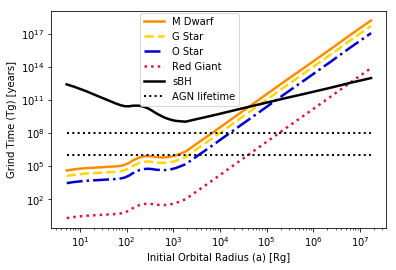

In [18]:
Tg_a_plot(pi/4,σam_SG,hint_SG,ρ_SG,'SG')

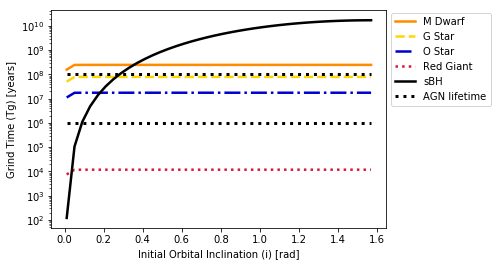

In [19]:
Tg_i_plot(10**4*Rg,hint_SG,ρ_SG,'SG')

In [20]:
def Tgrind_a_plot(i,ams,ρ,hint,name): # (a,Tg)
    #creating a list of values for Tdisk
    Tg1=[]  
    for j in range(len(ams)):
        Tg1.append(Tgrind(i,ams[j],msun,rsun,ρ,hint))
    Tg2=[]
    for j in range(len(ams)):
        Tg2.append(Tgrind(i,ams[j],mmstar,rmstar,ρ,hint))
    Tg3=[]
    for j in range(len(ams)):
        Tg3.append(Tgrind(i,ams[j],mostar,rostar,ρ,hint))
    Tg4=[]
    for j in range(len(ams)):
        Tg4.append(Tgrind(i,ams[j],mrgiant,rrgiant,ρ,hint))
    Tg5=[]
    for j in range(len(ams)):
        Tg5.append(Tgrind(i,ams[j],m_sBH,rBH(i,ams[j]),ρ,hint))
    TentoSix=[]
    for j in range(len(ams)):
        TentoSix.append(10**6)
    TentoEight=[]
    for j in range(len(ams)):
        TentoEight.append(10**8)
    logPlot=plt.gca()
    logPlot.loglog(ams/Rg,Tg2,'r--',lw=2, label='M Dwarf',c='palevioletred')
    logPlot.loglog(ams/Rg,Tg1,'r-',lw=2,label='G Star',c='palevioletred')
    logPlot.loglog(ams/Rg,Tg3,'r--',lw=2,label='O Star',c='darkmagenta')
    logPlot.loglog(ams/Rg,Tg4,'r-',lw=2,label='Red Giant',c='darkmagenta')
    logPlot.loglog(ams/Rg,Tg5,'r-',lw=2,label='sBH',c='black')
    logPlot.loglog(ams/Rg,TentoEight,'r:',lw=2,label='AGN lifetime',c='black')
    logPlot.loglog(ams/Rg,TentoSix,'r:',lw=2,c='black')
    plt.title(name+' Grind Time (Tg) vs Radius (a)')
    logPlot.set_xlabel('Radius (a) [Rg]')
    logPlot.set_ylabel('Grind Time (Tg) [years]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
    plt.savefig('new'+name+' Tg vs a.pdf')

def Tgrind_i_plot(am,ρ,hint,name): # (i,Tg)  
    irange=ivals(am,hint)
    #creating a list of values for Tdisk
    Tg1=[]
    for j in range(len(irange)):
        Tg1.append(Tgrind(irange[j],am,msun,rsun,ρ,hint))
    Tg2=[]
    for j in range(len(irange)):
        Tg2.append(Tgrind(irange[j],am,mmstar,rmstar,ρ,hint))
    Tg3=[]
    for j in range(len(irange)):
        Tg3.append(Tgrind(irange[j],am,mostar,rostar,ρ,hint))
    Tg4=[]
    for j in range(len(irange)):
        Tg4.append(Tgrind(irange[j],am,mrgiant,rrgiant,ρ,hint))
    Tg5=[]
    for j in range(len(irange)):
        Tg5.append(Tgrind(irange[j],am,m_sBH,rBH(irange[j],am),ρ,hint))
    TentoSix=[]
    for j in range(len(irange)):
        TentoSix.append(10**6)
    TentoEight=[]
    for j in range(len(irange)):
        TentoEight.append(10**8)
    logPlot=plt.gca()
    logPlot.semilogy(irange,Tg2,'r--',lw=2, label='M Dwarf',c='palevioletred')
    logPlot.semilogy(irange,Tg1,'r-',lw=2, label='G Star',c='palevioletred')
    logPlot.semilogy(irange,Tg3,'r--',lw=2,label='O Star',c='darkmagenta')
    logPlot.semilogy(irange,Tg4,'r-',lw=2, label='Red Giant',c='darkmagenta')
    logPlot.semilogy(irange,Tg5,'r-',lw=2,label='sBH',c='black')
    logPlot.semilogy(irange,TentoEight,'r:',lw=2,label='AGN lifetime',c='black')
    logPlot.semilogy(irange,TentoSix,'r:',lw=2,c='black')
    plt.title(name+' Grind Time (Tg) vs Initial Inclination Angle (i)')
    logPlot.set_xlabel('Initial Inclination Angle (i) [rad]')
    logPlot.set_ylabel('Grind Time (Tg) [years]')
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.2))
    plt.savefig('new'+name+' Tg vs i.pdf')
    


In [21]:
def logplot(x,y,conditions,labelx,labely,title): 
    logPlot=plt.gca()
    logPlot.loglog(x,y,label=conditions)
    plt.title(labelx+' vs '+labely)
    logPlot.set_xlabel(labelx)
    logPlot.set_ylabel(labely)
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(0,0.125))
    plt.savefig(title+'.pdf')
    
def semilogplot(x,y,conditions,labelx,labely,title): 
    logPlot=plt.gca()
    logPlot.semilogx(x,y,label=conditions)
    plt.title(labelx+' vs '+labely)
    logPlot.set_xlabel(labelx)
    logPlot.set_ylabel(labely)
    logPlot.legend()
    ax = plt.subplot(111)
    ax.legend(loc='center left', bbox_to_anchor=(0,0.125))
    plt.savefig(title+'.pdf')

# My version

In [22]:
def Disk_plot(): 
    fig, ax = plt.subplots(figsize=(12,10))
    bsfont = {'fontname':'Cambria Math'}
    ax.set_yscale('symlog')
    ax.set_xscale('symlog')
    ax.plot(harg_TQM,h_TQM/1.5e11,lw=3, label='TQM',c='r')
    ax.plot(harg_SG,h_SG/1.5e11,lw=3, label='SG',c='b')
    ax.plot(-harg_TQM,-h_TQM/1.5e11,lw=3, c='r')
    ax.plot(-harg_SG,-h_SG/1.5e11,lw=3, c='b')
    ax.plot(-harg_TQM,h_TQM/1.5e11,lw=3, c='r')
    ax.plot(-harg_SG,h_SG/1.5e11,lw=3, c='b')
    ax.plot(harg_TQM,-h_TQM/1.5e11,lw=3, c='r')
    ax.plot(harg_SG,-h_SG/1.5e11,lw=3, c='b')
    plt.axhline(y=0,lw=2,linestyle="--",c='black',alpha=0.5)
    Circle1 = plt.Circle((0,0),1.5, color='black')
    ax.add_artist(Circle1)
    plt.savefig('New Height vs a.pdf')

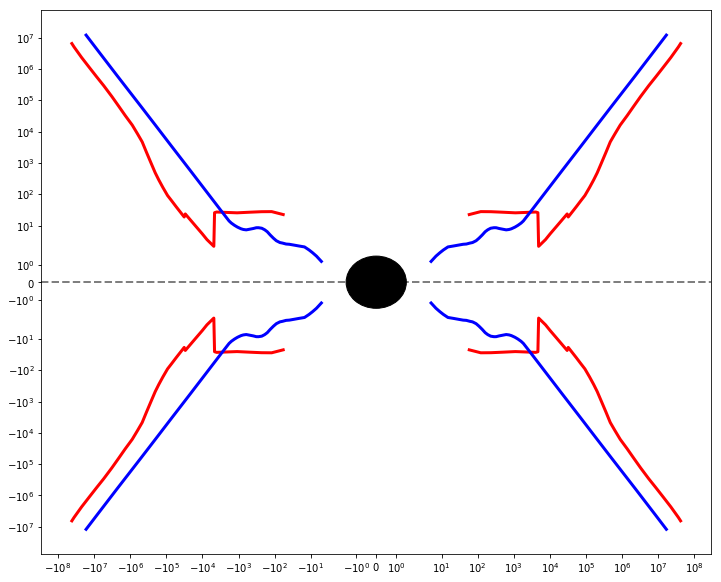

In [23]:
Disk_plot()
plt.show()

In [68]:
'Here things depend on the position of the object, its other properties(ie mass, rad, etc.), as well as the model'''

mbh= 1.99e30*10

# Energy of orbit Eorb
def Eorb(am,mstar): #creating function for energy of orbit Eorb as function of radius #input radius in meters
    eorb=(-G*M*mstar/(2*am))
    return eorb #units of joules

# Drag Force component-wise with some values in arrays
def Fx(mstar,i,am,ρ):#N (kgm/s^2)
    force=4*pi*G**2*mstar**2*ρ(am)*1/(vrx(i,am)**2)
    return force
def Fy(mstar,i,am,ρ):#N (kgm/s^2)
    force=4*pi*G**2*mstar**2*ρ(am)*1/(vry(i,am)**2)
    return force

'''WORK'''
def Wx(mstar,i,am,ρ,hint):
    work=Fx(mstar,i,am,ρ)*(arc(i,am,hint)*cos(i))
    return work
def Wy(mstar,i,am,ρ,hint):
    work=Fy(mstar,i,am,ρ)*(arc(i,am,hint)*sin(i))
    return work
def Worb(mstar,i,am,ρ,hint):
    work=((Wx(mstar,i,am,ρ,hint)**2)+(Wy(mstar,i,am,ρ,hint)**2))**0.5
    return work

'''new Eorb'''
def newEorb(i,am,mstar,ρ,hint): #creating function for energy of orbit Eorb as function of radius #input radius in meters
    eorb=Eorb(am,mstar)-Worb(mstar,i,am,ρ,hint)
    return eorb #units of joules

'''new a'''
def a_new(i,am,mstar,ρ,hint):
    radius=(-G*M*mstar)/(2*newEorb(i,am,mstar,ρ,hint)) #meters
    #print("initial_a =",am)
    #print("E orbit   =",Eorb(am,mstar))
    #print("W orbit.  =",Worb(i,am,rstar,ρ,hint))
    #print("new E Orb =",newEorb(i,am,mstar,rstar,ρ,hint))
    return radius

def dvy(i,am,mstar,ρ,hint): #m/s
    change=Fy(mstar,i,am,ρ)*Tdisk(i,am,hint)/mstar
    return change
def dvx(i,am,mstar,ρ,hint): #m/s
    change=Fx(mstar,i,am,ρ)*Tdisk(i,am,hint)/mstar
    return change

def vkx_new(i_in,am_in,mstar,ρ,hint):
    vkx_in=vkx(i_in,am_in)
    new=vkx_in+dvx(i_in,am_in,mstar,ρ,hint)
    return new
def vky_new(i_in,am_in,mstar,ρ,hint):
    vky_in=vky(i_in,am_in)
    new=vky_in+dvy(i_in,am_in,mstar,ρ,hint)
    return new
def i_new(i_in,am_in,mstar,ρ,hint):
    new=arctan(vky_new(i_in,am_in,mstar,ρ,hint)/vkx_new(i_in,am_in,mstar,ρ,hint))
    #print(i_in)
    return new

def vk_new(i_in,am_in,mstar,ρ,hint):
    new=(((vkx_new(i_in,am_in,mstar,ρ,hint))**2)+((vky_new(i_in,am_in,mstar,ρ,hint))**2))**0.5
    return new

In [69]:
def Tgrind(i,am,mstar,ρ,hint): 
    n=0
    t_sum=0
    initial_i=i
    initial_a=am
    min_i=imin(am,hint)
    new_i=i
    new_a=am
    condition1=True
    condition2=True 
    condition3=True
    num=[n]
    rad=[am]
    inc=[i]
    time=[t_sum]
    name=[] #orbital radius, orbital inclination, grind time progress

    while condition1==True and condition2==True: #and condition3==True:
        n=n+1
        dt=Torb(new_a)/2
        t_sum=t_sum+dt
        new_i=i_new(initial_i,initial_a,mstar,ρ,hint)
        new_a=a_new(initial_i,initial_a,mstar,ρ,hint)
        min_i=imin(new_a,hint)
        initial_i=new_i
        initial_a=new_a
        if new_a<=6*Rg: 
            condition1=False
        if new_i<=min_i:
            condition2=False
        if new_i<=i/e:
            condition3=False
        if n%1==0:
            num.append(n)
            rad.append(new_a)
            inc.append(new_i)
            time.append(t_sum)
            print("condition1 =",condition1,"condition2 =",condition2,"condition3 =",condition3)
            print("n =",n,"t_sum =", t_sum, "seconds")
            print("a =",new_a,"i =",new_i)
            print('') #this will create a space between each iteration
        continue 
    else:
        print("condition1 =",condition1,"condition2 =",condition2,"condition3 =",condition3)
        print("final a =", new_a)
        print("final i =", new_i)
        print("number of passes through disk (n) =", n)
        print("grind time =", t_sum,"seconds","OR",t_sum/year,"years")
        name.append(num)
        name.append(rad)
        name.append(inc)
        name.append(time)
        return name
        #years=t_sum/year
        #return years

In [135]:
#mstar=mbh
Tgrind(pi/4,1e2*Rg,mbh,ρ_SG,hint_SG)

condition1 = True condition2 = True condition3 = False
n = 1 t_sum = 1120165.7981345023 seconds
a = 14999999999716.637 i = 0.17083445715342999

condition1 = True condition2 = False condition3 = False
n = 2 t_sum = 2240331.596237263 seconds
a = 14999999343141.219 i = 0.007331763129141633

condition1 = True condition2 = False condition3 = False
final a = 14999999343141.219
final i = 0.007331763129141633
number of passes through disk (n) = 2
grind time = 2240331.596237263 seconds OR 0.07103143932267797 years


[[0, 1, 2],
 [15000000000000.0, 14999999999716.637, 14999999343141.219],
 [0.7853981633974483, 0.17083445715342999, 0.007331763129141633],
 [0, 1120165.7981345023, 2240331.596237263]]

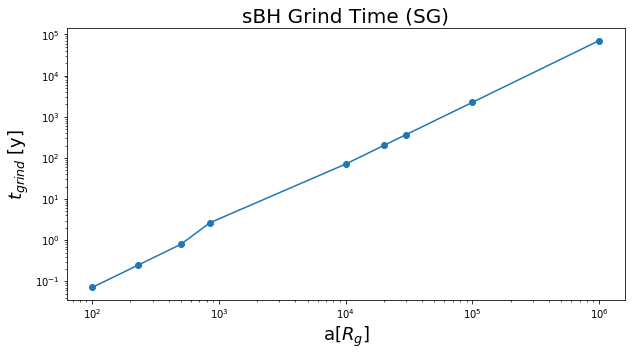

In [132]:
t_range = array([0.07103143932267797,0.24489316552142656,0.7930778779215504,2.658927787690533,71.03143263539638,200.9072,369.0901,2246.21,71031.36])
r = array([1e2,2.28e2,5e2,8.5e2,1e4,2e4,3e4,1e5,1e6])
plt.figure(figsize=(10,5))
plt.plot(r,t_range)
plt.scatter(r,t_range)
plt.ylabel('$t_{grind}$ [y]',fontsize=18)
plt.xlabel('a[$R_g$]',fontsize=18)
plt.title('sBH Grind Time (SG)',fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [95]:
harg_SG

array([5.11350401e+00, 6.97054346e+00, 8.92992927e+00, 1.12058269e+01,
       1.49597714e+01, 2.12436939e+01, 2.95515447e+01, 3.94466653e+01,
       4.84819349e+01, 6.08352727e+01, 7.17522672e+01, 9.00476262e+01,
       1.08455103e+02, 1.33362455e+02, 1.60643162e+02, 1.89515305e+02,
       2.28218423e+02, 2.80505076e+02, 3.24059842e+02, 3.90093419e+02,
       4.99547528e+02, 6.13882619e+02, 7.39111989e+02, 8.53976022e+02,
       1.07169728e+03, 1.29060642e+03, 1.58675980e+03, 1.83378534e+03,
       2.30241601e+03, 3.07592375e+03, 6.61361189e+03, 2.10681383e+04,
       7.14101423e+04, 2.00925201e+05, 4.89108713e+05, 2.30829707e+06,
       7.98768844e+06, 1.66498803e+07])